In [1]:
import pandas as pd
from omegaconf import OmegaConf
import os
import matplotlib.pyplot as plt
import datasets

In [2]:
def draw_dist(df, field, p, b=20):
    if p == None: 
        small_df = df[field].astype('int64')
        q = 1
    else:
        q = df[field].astype('int64').quantile(p)
        small_df = df[df[field].astype('int64') <= q][field].astype('int64')
    print(f"There is {len(small_df)}/{len(df)} small repos less the {q} in {field}")
    plt.hist(small_df, bins=b, edgecolor='black')
    
    plt.title(f'{field} distribution')
    plt.xlabel(field)
    plt.ylabel('frequency')
    plt.show()

In [3]:
metrics = [
    'repo_symbols_count',
    'repo_tokens_count',
    'repo_words_count',
    'repo_lines_count',
    'repo_files_count',
    'repo_code_symbols_count',
    'repo_code_tokens_count',
    'repo_code_words_count',
    'repo_code_lines_count',
    'repo_code_files_count',
    'description_symbols_count',
    'description_tokens_count',
    'description_words_count',
    'description_lines_count',
    'readme',
    'readme_symbols_count',
    'readme_tokens_count',
    'readme_words_count',
    'readme_lines_count'
]

# Java

In [4]:
df = datasets.load_dataset('JetBrains-Research/template-generation', 'java', split='dev', cache_dir=None).to_pandas()

Generating dev split:   0%|          | 0/81 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/30 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/51 [00:00<?, ? examples/s]

There is 73/81 small repos less the 679.0 in size


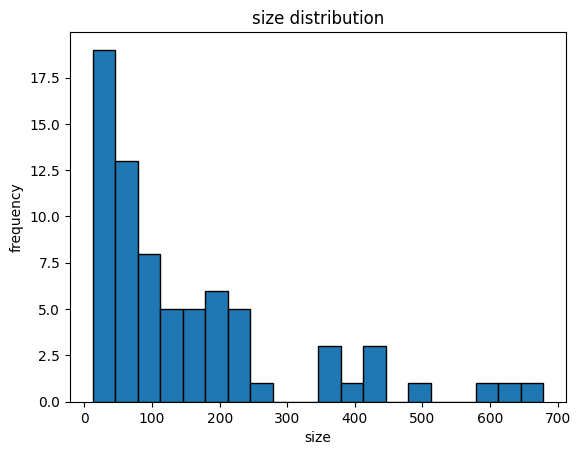

In [5]:
draw_dist(df, 'size', 0.9)

There is 81/81 small repos less the 1 in code_lines


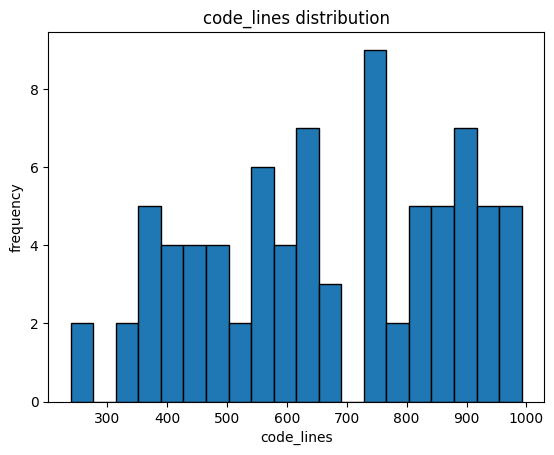

In [6]:
draw_dist(df, 'code_lines', None)

In [7]:
pd.set_option('display.float_format', '{:.0f}'.format)

In [8]:
df[metrics].describe()

,repo_symbols_count,repo_tokens_count,repo_words_count,repo_lines_count,repo_files_count,repo_code_symbols_count,repo_code_tokens_count,repo_code_words_count,repo_code_lines_count,repo_code_files_count,description_symbols_count,description_tokens_count,description_words_count,description_lines_count,readme_symbols_count,readme_tokens_count,readme_words_count,readme_lines_count
count,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81
mean,68413,17374,7979,2022,45,18001,3768,1494,511,9,76,17,11,1,3199,818,362,55
std,20947,5328,2534,459,9,16701,3809,1896,375,6,34,9,6,0,3087,779,338,55
min,38973,10866,4860,1216,33,3593,700,235,135,1,24,4,1,1,25,5,4,1
25%,56902,14759,6705,1760,38,9235,1887,714,274,5,48,10,7,1,990,297,117,18
50%,63956,16493,7512,1988,43,15137,3134,1116,443,7,72,14,10,1,2622,589,258,39
75%,74961,18566,8797,2220,49,21061,4293,1812,630,12,100,21,15,1,4112,1038,473,74
max,191090,45546,24400,4388,71,138989,32215,16745,2891,24,170,45,30,1,15273,3580,1525,266


# Python

In [9]:
df = datasets.load_dataset('JetBrains-Research/template-generation', 'py', split='dev', cache_dir=None).to_pandas()

Generating dev split:   0%|          | 0/565 [00:00<?, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating train split:   0%|          | 0/565 [00:00<?, ? examples/s]

In [10]:
df['description_words_count'] = df.apply(lambda dp: len(dp['description'].split()), axis=1)

There is 559/565 small repos less the 42.360000000000014 in description_words_count


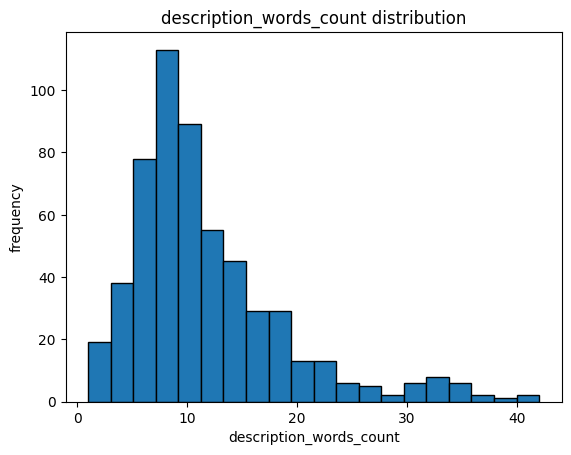

In [11]:
draw_dist(df, 'description_words_count', 0.99)

There is 508/565 small repos less the 6671.400000000006 in size


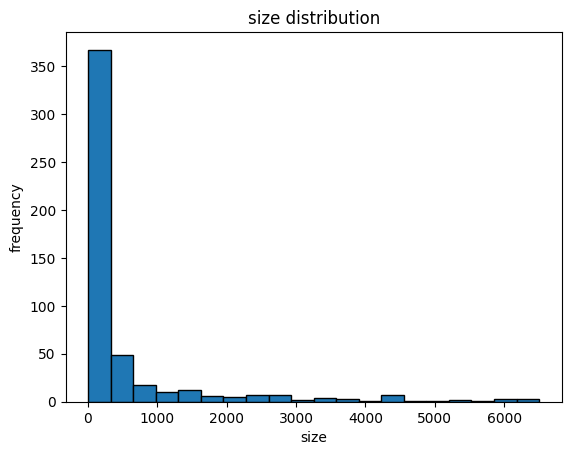

In [12]:
draw_dist(df, 'size', 0.9)

There is 565/565 small repos less the 1 in code_lines


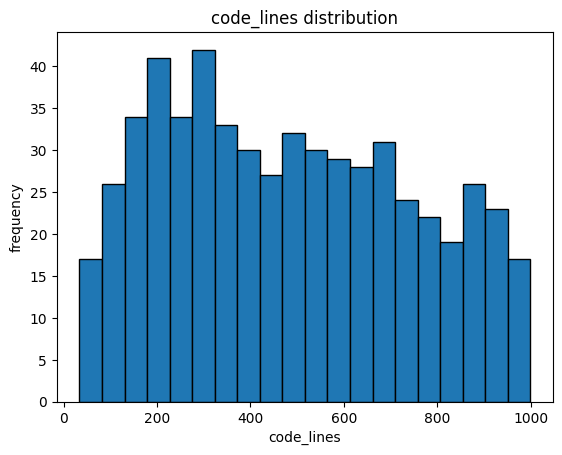

In [13]:
draw_dist(df, 'code_lines', None)

In [14]:
df[metrics].describe()

,repo_symbols_count,repo_tokens_count,repo_words_count,repo_lines_count,repo_files_count,repo_code_symbols_count,repo_code_tokens_count,repo_code_words_count,repo_code_lines_count,repo_code_files_count,description_symbols_count,description_tokens_count,description_words_count,description_lines_count,readme_symbols_count,readme_tokens_count,readme_words_count,readme_lines_count
count,565,565,565,565,565,565,565,565,565,565,565,565,565,565,565,565,565,565
mean,164172,56359,17436,3752,43,13979,3457,1243,409,8,88,19,13,1,3910,1033,474,64
std,1082824,408060,115151,29782,14,17282,5558,1432,360,9,107,23,17,0,5306,1565,620,75
min,28246,7823,4231,918,26,0,0,0,0,0,4,2,1,1,24,6,1,1
25%,43381,11825,5819,1405,32,4687,1191,432,158,2,52,10,8,1,1247,313,151,23
50%,56586,14974,7086,1778,39,10263,2351,873,323,5,69,15,10,1,2464,651,309,44
75%,75367,20070,8802,2165,51,18206,4514,1592,555,11,102,22,15,1,4594,1202,564,81
max,20060827,8572610,2143061,625101,120,308034,93775,22811,4532,65,2297,432,376,1,54066,19510,7116,677


# Kotlin

In [15]:
df = datasets.load_dataset('JetBrains-Research/template-generation', 'kt', split='dev', cache_dir=None).to_pandas()

Generating dev split:   0%|          | 0/19 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/13 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/6 [00:00<?, ? examples/s]

In [16]:
df['description_words_count'] = df.apply(lambda dp: len(dp['description'].split()), axis=1)

There is 18/19 small repos less the 35.300000000000004 in description_words_count


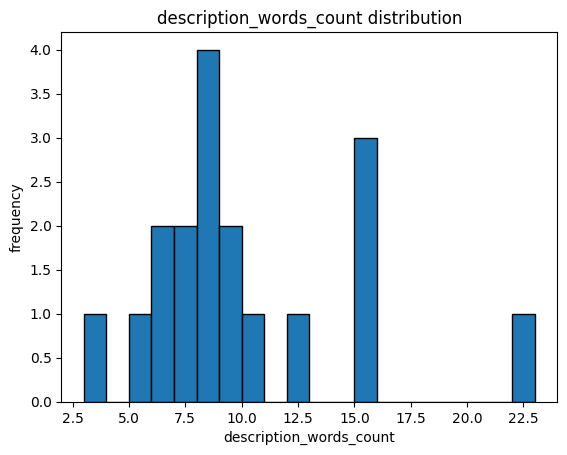

In [17]:
draw_dist(df, 'description_words_count', 0.99)

There is 14/19 small repos less the 4347.5 in size


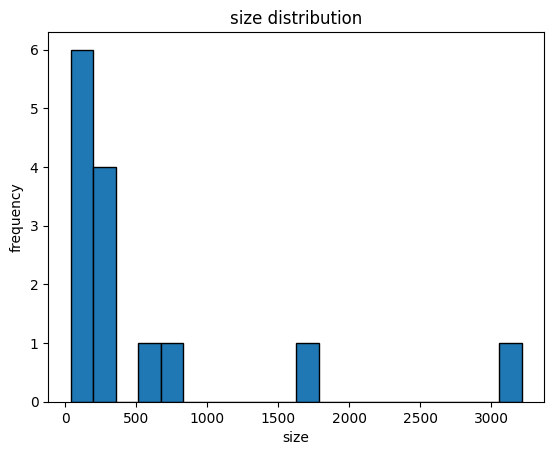

In [18]:
draw_dist(df, 'size', 0.75)

There is 19/19 small repos less the 1 in code_lines


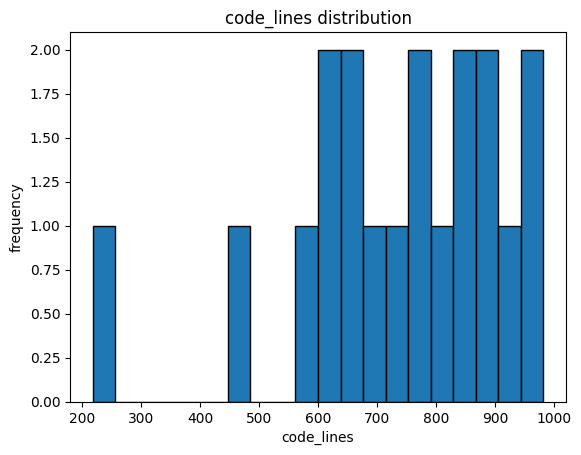

In [19]:
draw_dist(df, 'code_lines', None)

In [20]:
df[metrics].describe()

,repo_symbols_count,repo_tokens_count,repo_words_count,repo_lines_count,repo_files_count,repo_code_symbols_count,repo_code_tokens_count,repo_code_words_count,repo_code_lines_count,repo_code_files_count,description_symbols_count,description_tokens_count,description_words_count,description_lines_count,readme_symbols_count,readme_tokens_count,readme_words_count,readme_lines_count
count,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19
mean,85409,25106,9040,2537,55,9375,1990,771,307,10,70,15,11,1,3376,791,395,66
std,57790,23817,3107,1548,9,3748,879,364,134,6,44,9,8,0,4051,930,502,105
min,36013,9851,5384,1230,39,2436,621,312,111,2,18,4,3,1,87,21,4,1
25%,62826,16163,7572,1921,49,7453,1547,514,231,6,42,10,7,1,766,184,93,12
50%,69118,17807,8166,2147,56,8739,1895,716,274,10,58,12,8,1,1759,446,186,41
75%,76505,19611,9330,2308,61,11483,2247,907,365,12,88,18,14,1,3694,822,423,72
max,293783,108530,19799,8281,71,18693,4324,1634,573,29,204,43,38,1,15030,3479,1930,473
